In [274]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as cx
import cartopy.crs as ccrs


In [275]:
# pip install contextily
# !pip install cartopy


In [276]:
df1 = gpd.read_file(
    "/Users/test/Documents/code/iccs25/data/processed/df_settlements_mezen.geojson"
).to_crs(4326)
df2 = gpd.read_file(
    "/Users/test/Documents/code/iccs25/data/processed/df_settlements_yakut_chuk.geojson"
).to_crs(4326)
df3 = gpd.read_file(
    "/Users/test/Documents/code/iccs25/data/processed/df_settlements_yanao_kras.geojson"
).to_crs(4326)

df1["region"] = "mezen"
df2["region"] = "yakut_chuk"
df3["region"] = "yanao_kras"


In [277]:
df = pd.concat([df1, df2, df3], ignore_index=True)


In [278]:
display(df)


,id,name,population,geometry,region
0,0,Азаполье,9,POINT (45.17779 65.29261),mezen
1,1,Баковская,33,POINT (46.38103 65.7242),mezen
2,2,Березник,134,POINT (44.99312 65.4793),mezen
3,3,Бор,0,POINT (44.38419 65.7135),mezen
4,4,Бычье,146,POINT (45.05246 65.79109),mezen
...,...,...,...,...,...
103,33,Усть-Авам,513,POINT (92.82316 71.11474),yanao_kras
104,34,Усть-Порт,338,POINT (84.40791 69.66365),yanao_kras
105,35,Хантайское Озеро,354,POINT (89.98658 68.2196),yanao_kras
106,36,Хатанга,2645,POINT (102.47148 71.98192),yanao_kras


In [279]:
nord_palette = {
    "polar_night": {
        "nord0": "#2e3440",
        "nord1": "#3b4252",
        "nord2": "#434c5e",
        "nord3": "#4c566a",
    },
    "snow_storm": {
        "nord4": "#d8dee9",
        "nord5": "#e5e9f0",
        "nord6": "#eceff4",
    },
    "frost": {
        "nord7": "#8fbcbb",
        "nord8": "#88c0d0",
        "nord9": "#81a1c1",
        "nord10": "#5e81ac",
    },
    "aurora": {
        "nord11": "#bf616a",
        "nord12": "#d08770",
        "nord13": "#ebcb8b",
        "nord14": "#a3be8c",
        "nord15": "#b48ead",
    },
}


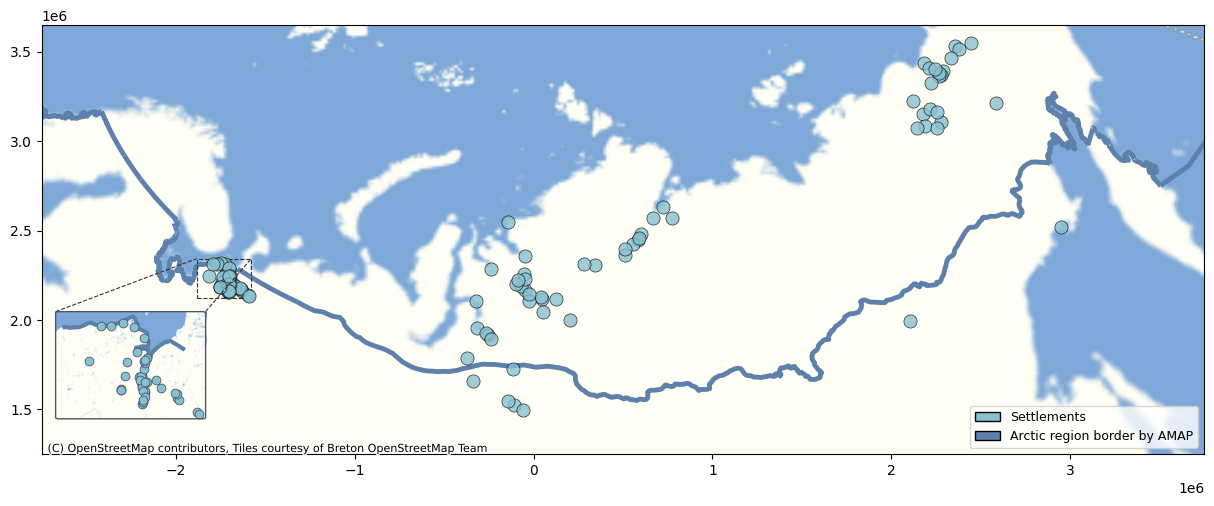

In [299]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Main map (Orthographic projection)
proj = ccrs.Orthographic(85, 50)
fig, ax = plt.subplots(figsize=(15, 7))
# ax = fig.add_subplot(1, 1, 1, projection=proj)

# Plot main data
df.to_crs(proj).plot(
    ax=ax,
    alpha=0.8,
    edgecolor="k",
    markersize=90,
    color=nord_palette["frost"]["nord8"],
    linewidth=0.5,
    zorder=2,
    # transform=proj
)

# Plot AMAP boundary
amap = gpd.read_file(
    "/Users/test/Documents/code/iccs25/new_notebooks/AMAP-area/amaplim_geo_nw.shp"
)
amap.to_crs(proj).plot(
    ax=ax, linewidth=3.5, zorder=1, color=nord_palette["frost"]["nord10"]
)

cx.add_basemap(ax, crs=proj, source="OpenStreetMap.CAT")
ax.set_xlim([-2.75 * 1e6, 3.75 * 1e6])
ax.set_ylim([1.25 * 1e6, 3.65 * 1e6])

# ========== Inset map (Web Mercator) ================================================================================
# First create regular inset axes
ax_inset = inset_axes(ax, width=1.5, height=1.5, loc="lower left", borderpad=1)

# Get bounds for the inset area

# Plot inset data
mezen_only = amap.to_crs(3857).clip(df1.to_crs(3857).buffer(2e5)).to_crs(proj)

mezen_only.plot(
    ax=ax_inset, linewidth=3, zorder=1, color=nord_palette["frost"]["nord10"]
)
df1.to_crs(proj).plot(
    ax=ax_inset,
    alpha=1,
    edgecolor=nord_palette["polar_night"]["nord3"],
    markersize=40,
    color=nord_palette["frost"]["nord8"],
    zorder=2,
    linewidth=0.6,
)
cx.add_basemap(ax_inset, crs=proj, source="OpenStreetMap.CAT", attribution="")
ax_inset.set_axis_off()


# Connect the main and inset maps
mark_inset(
    ax, ax_inset, loc1=1, loc2=2, fc="none", ec=".2", linestyle="--", linewidth=0.8
)

from matplotlib.patches import FancyBboxPatch

# Add border manually with FancyBboxPatch
fig = plt.gcf()
bbox = ax_inset.get_position()

border = FancyBboxPatch(
    (bbox.x0, bbox.y0),
    bbox.width,
    bbox.height,
    boxstyle="round,pad=0,rounding_size=0.002",  # or "square"
    linewidth=1,
    edgecolor=nord_palette["polar_night"]["nord3"],
    facecolor="none",
    transform=fig.transFigure,
    zorder=0,
)

fig.patches.append(border)

import matplotlib.patches as mpatches

# Define patches for the legend
legend_elements = [
    mpatches.Patch(
        facecolor=nord_palette["frost"]["nord8"], edgecolor="k", label="Settlements"
    ),
    mpatches.Patch(
        facecolor=nord_palette["frost"]["nord10"],
        edgecolor="k",
        label="Arctic region border by AMAP",
    ),
]

# Add to figure
ax.legend(handles=legend_elements, loc="lower right", fontsize=9, frameon=True)

plt.show()


In [281]:
# !pip install geodatasets
